In [1]:
# relative paths to the movie lens data set for movies file and ratings file
movies_path = '/Users/anujarora/Downloads/Week-4-Pandas/movielens/movies.csv'

# import DataFrame from pandas package so that we can work with this tabular data
import pandas as pd
from pandas import DataFrame as df

movies_df = pd.read_csv(movies_path)

# now that we have a DataFrame lets peek into the data and see how it looks
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
# now lets see how many movies are there in this data
len(movies_df.index)

27278

In [3]:
# we can also get high level information of the width and height of the data frame using shape property
movies_df.shape

(27278, 3)

In [4]:
# now we can access an element at a position using loc[x_pos][y_pos] syntax 
print (movies_df.loc[0][0])
print (movies_df.loc[0][1])
print (movies_df.loc[0][2])

1
Toy Story (1995)
Adventure|Animation|Children|Comedy|Fantasy


In [5]:
# we can explicitly set the index column if our data has a unique identifier for each row using set_index
movies_df.set_index('movieId')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# now lets find out how many animation vs comedy movies exist in this dataset

movies_df['genres_arr'] = movies_df['genres'].str.split('|')
movies_df.head()

,movieId,title,genres,genres_arr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [7]:
animation_df = movies_df[movies_df.genres_arr.map(lambda x: 'Animation' in x)]
print ('# of animation movies'), len(animation_df.index)

romance_df = movies_df[movies_df.genres_arr.map(lambda x: 'Comedy' in x)]
print ('# of romance movies'), len(romance_df.index)

# of animation movies
# of romance movies


(None, 8374)

In [8]:
# now lets find the real masala movies which has Action and Romance and Comedy and Thriller :)
masala_lambda = lambda x: set(['Romance','Comedy', 'Action', 'Thriller']).issubset(x)
masala_movies = movies_df[movies_df.genres_arr.map(masala_lambda)]
print ('# of masala movies'), (len(masala_movies.index))
masala_movies

# of masala movies


,movieId,title,genres,genres_arr
376,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
2383,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
4624,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...,"[Action, Animation, Comedy, Crime, Drama, Roma..."
4860,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,"[Action, Adventure, Comedy, Drama, Romance, Th..."
6454,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
6604,6714,So Close (Chik Yeung Tin Sai) (2002),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
9691,31367,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller,"[Action, Adventure, Comedy, Crime, Romance, Th..."
10290,34435,Sholay (1975),Action|Adventure|Comedy|Musical|Romance|Thriller,"[Action, Adventure, Comedy, Musical, Romance, ..."
12190,55603,My Mom's New Boyfriend (2008),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
14975,75408,Lupin III: Sweet Lost Night (Rupan Sansei: Swe...,Action|Animation|Comedy|Crime|Drama|Mystery|Ro...,"[Action, Animation, Comedy, Crime, Drama, Myst..."


In [9]:
# now lets add another column to our dataframe which will count the number of genres for each movie
counter_lambda = lambda x: len(x)
movies_df['genre_count'] = movies_df.genres_arr.apply(counter_lambda)
movies_df.head()

,movieId,title,genres,genres_arr,genre_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1


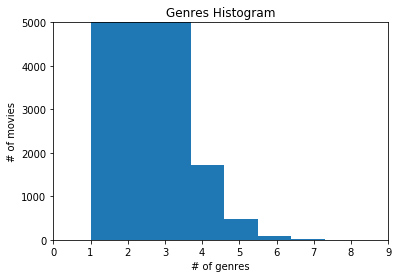

In [10]:
# now lets analyze how many genres do various movies have by plotting a histogram of genres

# introducing the matplotlib package which lets us plot charts, graphs in Python
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(movies_df.genre_count)
plt.title("Genres Histogram")
plt.xlabel("# of genres")
plt.ylabel("# of movies")
plt.axis([0, 9, 0, 5000])
plt.show()

In [11]:
# now lets see how many movies are there for each genre

from collections import Counter

flattened_genres = [item for sublist in movies_df.genres_arr for item in sublist]

genre_dict = dict(Counter(flattened_genres))

print (genre_dict)

{'Adventure': 2329, 'Animation': 1027, 'Children': 1139, 'Comedy': 8374, 'Fantasy': 1412, 'Romance': 4127, 'Drama': 13344, 'Action': 3520, 'Crime': 2939, 'Thriller': 4178, 'Horror': 2611, 'Mystery': 1514, 'Sci-Fi': 1743, 'IMAX': 196, 'Documentary': 2471, 'War': 1194, 'Musical': 1036, 'Western': 676, 'Film-Noir': 330, '(no genres listed)': 246}


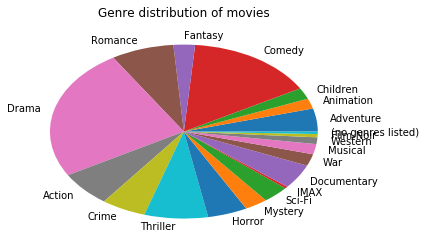

In [12]:
# now lets plot this genre distribution as a pie chart
plt.pie(genre_dict.values(), labels=genre_dict.keys())
plt.title('Genre distribution of movies')
plt.show()

In [13]:
# we can also save the plot as an image to share with other
plt.savefig('./movie-genres-pie.png')

[]

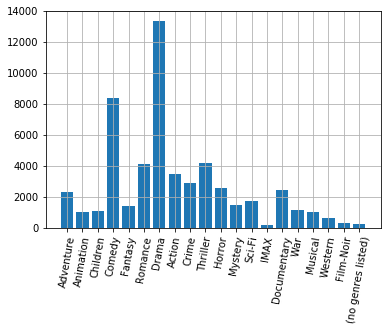

In [14]:
# we can also plot a bar chart (with grid lines and slanted x axis labels for better readability)
x = list(range(len(genre_dict)))
plt.xticks(x, genre_dict.keys(), rotation=80)
plt.bar(x, genre_dict.values())
plt.grid()
plt.plot()

In [15]:
# now lets move onto the movie ratings data
ratings_path = '/Users/anujarora/Downloads/Week-4-Pandas/movielens/ratings.csv'
ratings_df = pd.read_csv(ratings_path)

# lets see how the data looks
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [16]:
# how many ratings do we have?
print ('# ratings'), len(ratings_df.index)

# how many different movies have been rated?
print ('# movies'), len(ratings_df.movieId.unique())

# what are the different ratings given by users?
print ('rating values'), ratings_df.rating.unique()


# ratings
# movies
rating values


(None, array([3.5, 4. , 3. , 4.5, 5. , 2. , 1. , 2.5, 0.5, 1.5]))

In [17]:
# now lets find the average movie rating across all ratings

# introducing the numpy package which is used to find various stats out of data
import numpy as np

# lets find average rating using the numpy's mean method
np.mean(ratings_df.rating)

3.5255285642993797

In [18]:
# lets find the median rating
np.median(ratings_df.rating)

3.5

In [19]:
# lets find the 30th percentile rating 
np.percentile(ratings_df.rating, 30)

3.0

In [20]:
# lets find the most common rating given by users to movies (called mode of the data)
from scipy import stats
stats.mode(ratings_df.rating)

ModeResult(mode=array([4.]), count=array([5561926]))

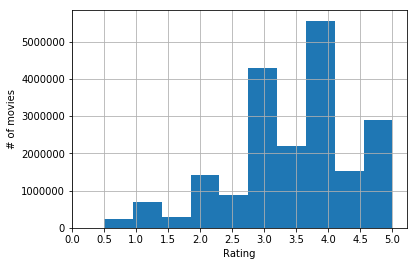

In [21]:
# now lets plot a histogram of movie ratings to get an overall picture
plt.hist(ratings_df.rating)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.ylabel('# of movies')
plt.grid()
plt.show()

In [22]:
# now lets find the highest rated movies (highest average rating)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [23]:
ratings_view = ratings_df[['movieId', 'rating']]
ratings_view.groupby(['movieId'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,rating
19152,95517,5.0
21842,105846,5.0
17703,89133,5.0
21656,105187,5.0
21658,105191,5.0
17556,88488,5.0
25936,126945,5.0
21762,105526,5.0
21763,105529,5.0
21840,105841,5.0


In [24]:
# now lets merge/join the movies_df and ratings_df so that we can see the actual movie titles of top 10 movies
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr,genre_count
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3


In [25]:
# now lets find the titles of the top 10 movies to see if we are missing on some awesome movies!
titles_df = merged_df[['movieId', 'title', 'rating']]
titles_df.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,title,rating
19152,95517,"Barchester Chronicles, The (1982)",5.0
21842,105846,Only Daughter (2013),5.0
17703,89133,Boys (Drenge) (1977),5.0
21656,105187,Linotype: The Film (2012),5.0
21658,105191,Rocaterrania (2009),5.0
17556,88488,"Summer Wishes, Winter Dreams (1973)",5.0
25936,126945,Small Roads (2011),5.0
21762,105526,Year Zero: The Silent Death of Cambodia (1979),5.0
21763,105529,Stealing a Nation (2004),5.0
21840,105841,B-Side (2013),5.0


In [26]:
# these movies are not what we expected to be in the Top 10 movies list, something's wrong here
# lets check how many ratings have these movies received, lets take an example of movieId 95517
len(merged_df[merged_df['movieId'] == 95517].index)

1

In [27]:
# now lets only consider movies which have atleast 100 ratings and see how the top 10 movies change
temp_df = titles_df.groupby(['movieId', 'title'], as_index=False).count()
well_rated_df = temp_df[temp_df['rating'] > 100].sort_values(by='rating', ascending=False)
well_rated_df.head()

,movieId,title,rating
293,296,Pulp Fiction (1994),67310
352,356,Forrest Gump (1994),66172
315,318,"Shawshank Redemption, The (1994)",63366
587,593,"Silence of the Lambs, The (1991)",63299
476,480,Jurassic Park (1993),59715


In [ ]:
# Great, so far we have seen how to extract various stats from our datasets using NumPy, Pandas 
# and visualize our data using Matplotlib, now lets do some predictive analytics..


In [28]:
# now lets add a column called rating_year which depicts the year when the rating was given
import datetime
year_lambda = lambda x: int(datetime.datetime.fromtimestamp(x).strftime('%Y'))
merged_df['rating_year'] = merged_df['timestamp'].apply(year_lambda)
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr,genre_count,rating_year
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3,2005
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3,1996
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3,1996
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3,1996
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3,1996


In [29]:
# now lets create a new data frame which contains number of ratings given on each year
ratings_per_year = merged_df.groupby(['rating_year'])['rating_year'].count()
ratings_per_year.head()

rating_year
1995          4
1996    1611737
1997     701717
1998     307948
1999    1197147
Name: rating_year, dtype: int64

In [31]:
# now lets get some stats on number of ratings per year

years = ratings_per_year.keys()
num_ratings = ratings_per_year.get_values()
print ('average ratings per year'), np.mean(num_ratings)
print ('median ratings per year'), np.median(num_ratings)
print ('90% ratings per year'), np.percentile(num_ratings, 90)

average ratings per year
median ratings per year
90% ratings per year


(None, 1611737.0)

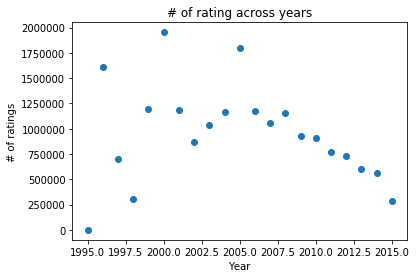

In [32]:
# now lets scatter plot this data to visualize how ratings are spead across years
plt.scatter(years, num_ratings)
plt.title('# of rating across years')
plt.xlabel('Year')
plt.ylabel('# of ratings')
plt.show()

In [34]:
# now lets try to build a linear regression model using which we will predict how many ratings we get each year
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(years, num_ratings)
print ('Generated linear model is  y = ' + str(slope) + ' * x + ' + str(intercept))

Generated linear model is  y = -16111.529870129869 * x + 33256010.865800865


In [35]:
# now lets use the slope and intercept to create a predict function which will predict num_ratings given a year
def predict_num_ratings(year):
    return slope * year + intercept

predicted_ratings = predict_num_ratings(years)

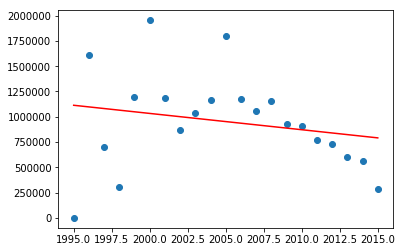

In [36]:
# now lets plot our predicted values along side the actual data to see how well we did
plt.scatter(years, num_ratings)
plt.plot(years, predicted_ratings, c='r')
plt.show()

In [44]:
# now lets see how good our prediction is by calculating the r-squared value
r_square = r_value ** 2
print ('Linear Model r_square value', r_square)

Linear Model r_square value 0.043157715252902705


In [45]:
# thats a poor model r_square ranges from 0 to 1, the close to 1 the better the model accuracy

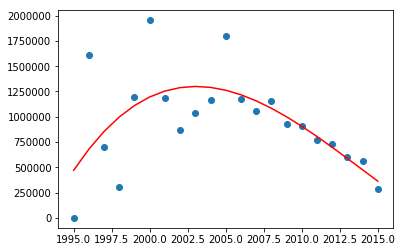

In [46]:
# now lets try a polynomial function instead of a linear function and see if that fits better
polynomial = np.poly1d(np.polyfit(years, num_ratings, 3))
plt.scatter(years, num_ratings)
plt.plot(years, polynomial(years), c='r')
plt.show()

In [47]:
# now lets calculate the r-square for this polynomial regression

from sklearn.metrics import r2_score
r2 = r2_score(num_ratings, polynomial(years))
print ('Polynomial Model r_square value', r2)

Polynomial Model r_square value 0.40257114508055436


In [48]:
# now we can predict how many ratings we expect in any year using our polynomial function
print (polynomial(2017))          
print (polynomial(2018))     

147208.51171875
46710.109375
